# ML Task 1.5 Supervised learning algorithms - part 2 - Decision Tree - Oslo - Stockholm - Budapest - Debilt - Dusseldorf - MunchenB - Belgrade weather stations

## Table of Contents

#### 01. Import libraries and datasets

#### 02. Decision tree classification algorithm

> #### 02.01 Oslo weather station

> #### 02.02 Stockholm weather station

> #### 02.03 Budapest weather station

> #### 02.04 Debilt weather station

> #### 02.05 Dusseldorf weather station

> #### 02.06 MunchenB weather station

> #### 02.07 Belgrade weather station

### 01. Import libraries and datasets

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles statistical models
import os
os.environ["OMP_NUM_THREADS"] = "1" # This only applies to this notebook session, to circumvent annoying Windows-constraint related warnings

import warnings # This is a library that handles warnings.
from statsmodels.tsa.stattools import adfuller # Imports the Augmented Dickey-Fuller Test for stationarity
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Imports autocorrelation and partial correlation function plotting functions
from datetime import datetime # Import a special function that allows a date variable to be converted to datetime, to re-set index to the latter
from pylab import rcParams # This will define a fixed size for all special charts, i.e. the time series decomposition charts

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or feature.
# These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

import operator
import graphviz
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, f1_score
from matplotlib.pyplot import figure

In [13]:
# Create path to dataset location
path = r'C:\Users\dirk8\CareerFoundry\07-2025 Machine Learning With Python\Datasets'

In [15]:
# Import the final transformed, split datasets from the "ML Task 1.5 part 2 - Basel - REVISED" jupyter notebook script.
X_train = pd.read_pickle(os.path.join(path, 'X_train.pkl'))
X_train_reduced = pd.read_pickle(os.path.join(path, 'X_train_reduced.pkl'))
X_test = pd.read_pickle(os.path.join(path, 'X_test.pkl'))
y_train = pd.read_pickle(os.path.join(path, 'y_train.pkl'))
y_test = pd.read_pickle(os.path.join(path, 'y_test.pkl'))

In [17]:
# Check dimensions
print("X_train shape:", X_train.shape)
print("X_train_reduced shape:", X_train_reduced.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (17211, 39)
X_train_reduced shape: (17211, 26)
y_train shape: (17211, 13)
X_test shape: (5738, 39)
y_test shape: (5738, 13)


In [19]:
X_train_reduced.head(2)

,BASEL_temp_mean,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_max,DEBILT_temp_mean,DEBILT_temp_max,DUSSELDORF_temp_mean,DUSSELDORF_temp_max,...,MADRID_temp_mean,MADRID_temp_max,MUNCHENB_temp_mean,MUNCHENB_temp_max,OSLO_temp_mean,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_max
DATE,,,,,,,,,,,,,,,,,,,,,
1982-05-04,-1.085876,-2.798598,0.899023,0.748243,2.146495,1.661393,-0.292950,-0.330847,0.863975,0.858822,...,-1.109096,-1.976637,0.803738,0.577551,1.116220,-0.07396,0.640783,0.363281,0.406228,-0.153647
2008-10-06,2.216577,0.902630,1.978051,1.718352,1.539823,2.167088,-0.146512,0.955457,0.561550,0.343457,...,0.844762,0.632403,2.181746,0.742598,0.515135,1.77206,2.002727,0.908343,0.270783,0.959359


In [21]:
X_train_reduced.tail(2)

,BASEL_temp_mean,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_max,DEBILT_temp_mean,DEBILT_temp_max,DUSSELDORF_temp_mean,DUSSELDORF_temp_max,...,MADRID_temp_mean,MADRID_temp_max,MUNCHENB_temp_mean,MUNCHENB_temp_max,OSLO_temp_mean,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_max
DATE,,,,,,,,,,,,,,,,,,,,,
1962-05-11,0.226057,0.060074,-1.402905,-1.552301,-2.846879,-1.228290,0.146364,0.477687,-0.432135,-0.378054,...,-0.052957,-0.553524,-0.421158,-0.467741,0.042854,0.479846,-1.121734,-1.271904,-0.225851,-0.844478
2003-04-01,-0.452529,1.143360,-2.374031,-2.245236,-1.820204,-1.408895,0.146364,0.220426,0.777568,0.687033,...,0.739148,0.909120,0.306124,1.320259,-0.644100,-1.661537,-0.520876,0.145256,0.090189,-0.230406


#### Comment: Imported dataset files are those used in the final Decision Tree model run for Basel weather station on a transformed, reduced-feature and weather station split dataset. (The X_train unreduced dataset is simply for reference, not for use in the current script.) This ensures that we can make valid station-vs-station comparisons across the board on all performance metrics for the Decision Tree model, using identical hyperparameters for each run.

### 02. Decision tree classification algorithm

#### 02.01 Oslo weather station

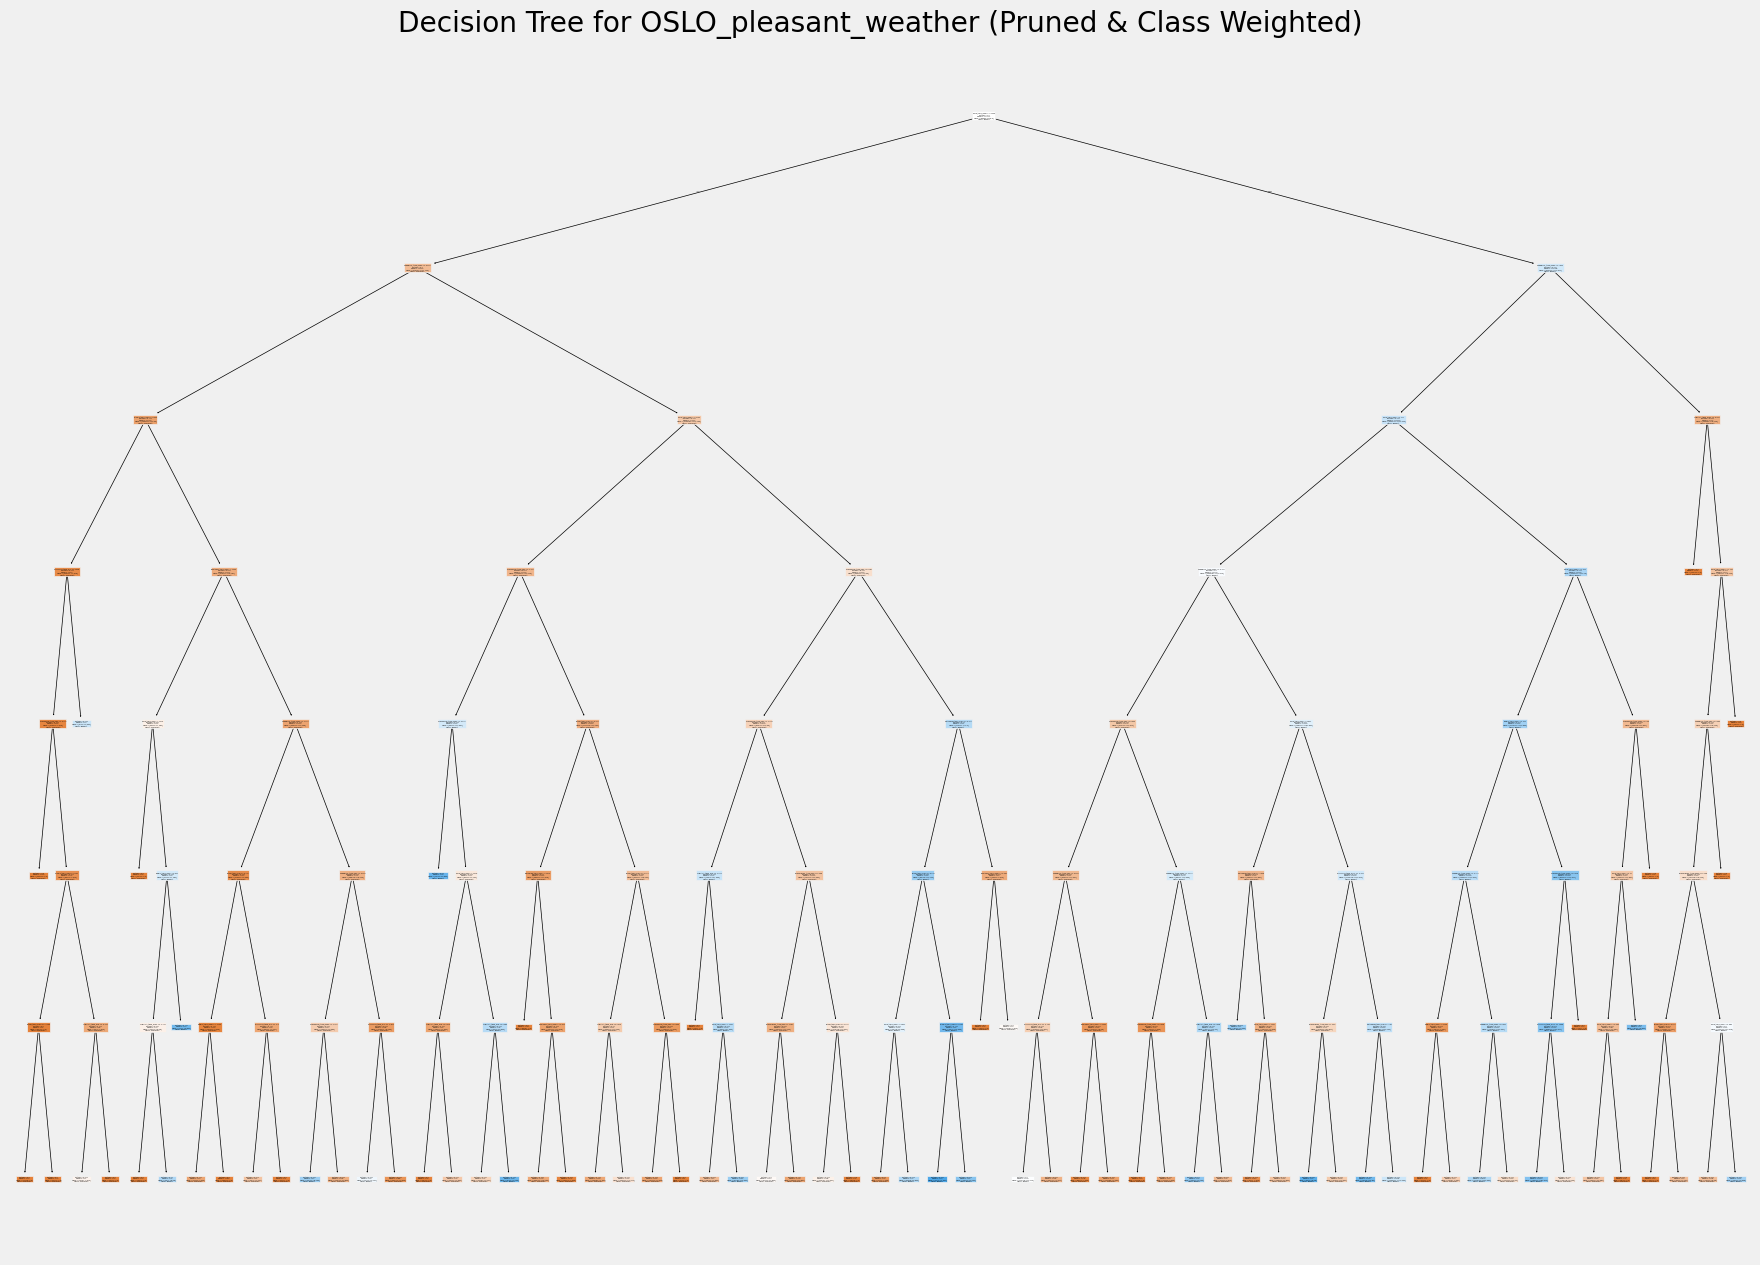

In [36]:
# We choose 'OSLO_pleasant_weather' as the target for this specific model
# class_weight='balanced' will handle the extreme class imbalance (~ 84.5/15.5 for OSLO in the answers dataset) during training

# IMPORTANT: Select one target column for both training and testing
target_station_column = 'OSLO_pleasant_weather' # Choose the target station
y_train_single_target = y_train[target_station_column].astype(int)
y_test_single_target = y_test[target_station_column].astype(int) # Note

# --- Train the model with adjusted parameters ---
best_dt = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=7, # Set max depth
                                    min_samples_split=2, # Set min samples to split
                                    min_samples_leaf=20, # Set min samples at leaf nodes
                                    class_weight='balanced', # Adjust class weights for imbalance
                                    random_state=42) # For reproducibility

# Fit the model using the single target column of scaled training data
best_dt.fit(X_train_reduced, y_train_single_target)

# Visualize the "pruned" Decision Tree
plt.figure(figsize=(20,15))
# class_names should reflect the binary labels of the chosen target column
plot_tree(best_dt, filled=True, feature_names=X_train_reduced.columns, class_names=['Unpleasant', 'Pleasant'])
plt.title(f"Decision Tree for {target_station_column} (Pruned & Class Weighted)")
plt.show()

#### Define the various evaluation metrics and logic

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    balanced_accuracy_score,
    ConfusionMatrixDisplay,
)

def evaluate_model_per_station(model, X_train, y_train_df, X_test, y_test_df, station_column):
    """
    Evaluate a trained classification model on a specific weather station target column.
    Returns detailed metrics and side-by-side confusion matrices for Train and Test sets.
    """

    # Select binary target column (for one station)
    y_train = y_train_df[station_column].astype(int)
    y_test = y_test_df[station_column].astype(int)

    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Internal function to compute all key metrics
    def compute_metrics(y_true, y_pred, dataset_name):
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        f1 = f1_score(y_true, y_pred, zero_division=0)
        balanced_acc = balanced_accuracy_score(y_true, y_pred)
        overall_acc = (tp + tn) / (tp + tn + fp + fn)

        return {
            "Dataset": dataset_name,
            "Overall Accuracy": overall_acc,
            "Recall (Pleasant)": recall,
            "Precision (Pleasant)": precision,
            "Specificity (Unpleasant)": specificity,
            "F1 Score (Pleasant)": f1,
            "Balanced Accuracy": balanced_acc,
            "TP": tp,
            "FP": fp,
            "TN": tn,
            "FN": fn,
        }

    # Compute for both sets
    train_metrics = compute_metrics(y_train, y_pred_train, "Train")
    test_metrics = compute_metrics(y_test, y_pred_test, "Test")
    metrics_df = pd.DataFrame([train_metrics, test_metrics]).set_index("Dataset")

    # Plot side-by-side confusion matrices
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train,
                                            display_labels=["Unpleasant", "Pleasant"],
                                            cmap="Greens", ax=axes[0])
    axes[0].set_title(f"Train Confusion Matrix\n({station_column})")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,
                                            display_labels=["Unpleasant", "Pleasant"],
                                            cmap="Blues", ax=axes[1])
    axes[1].set_title(f"Test Confusion Matrix\n({station_column})")
    plt.tight_layout()

    return metrics_df

#### Call the multi-output custom evaluation function

,Overall Accuracy,Recall (Pleasant),Precision (Pleasant),Specificity (Unpleasant),F1 Score (Pleasant),Balanced Accuracy,TP,FP,TN,FN
Dataset,,,,,,,,,,
Train,0.604265,0.807346,0.254881,0.567008,0.387445,0.687177,2154,6297,8246,514
Test,0.577902,0.723381,0.232945,0.550445,0.352406,0.636913,659,2170,2657,252


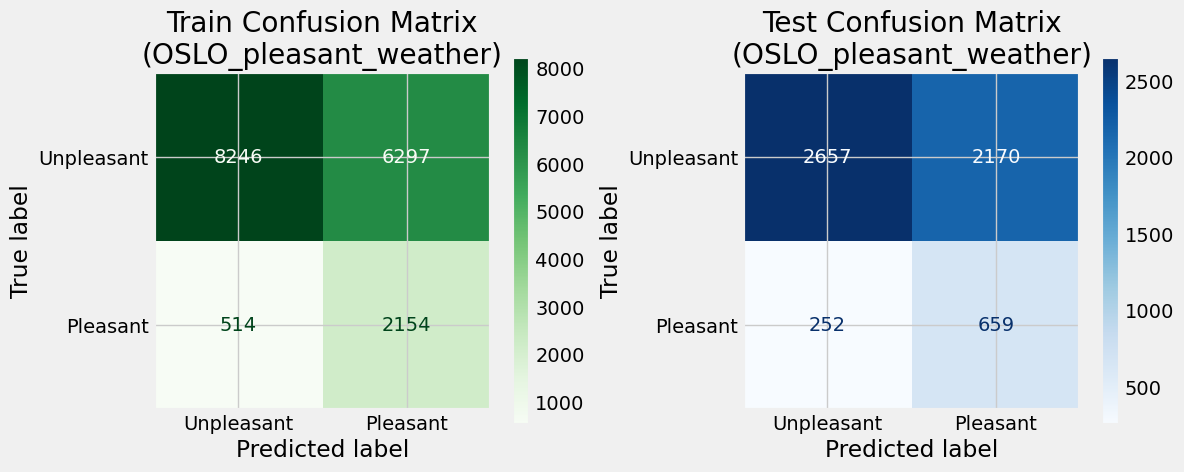

In [42]:
evaluate_model_per_station(
    model=best_dt,
    X_train=X_train_reduced,  # This uses the feature-reduced, z-score standardized differenced weather data
    y_train_df=y_train,       # This is the answers dataset
    X_test=X_test[X_train_reduced.columns],  # Reduce test set to same 26 columns
    y_test_df=y_test,
    station_column="OSLO_pleasant_weather"  # Change this to the relevant weather station target column
)

### Make comment.

#### Plot learning curves to assess likelihood of overfitting, underfitting or neither.  This uses learning_curve from sklearn.model_selection and evaluates the model across increasing training set sizes.

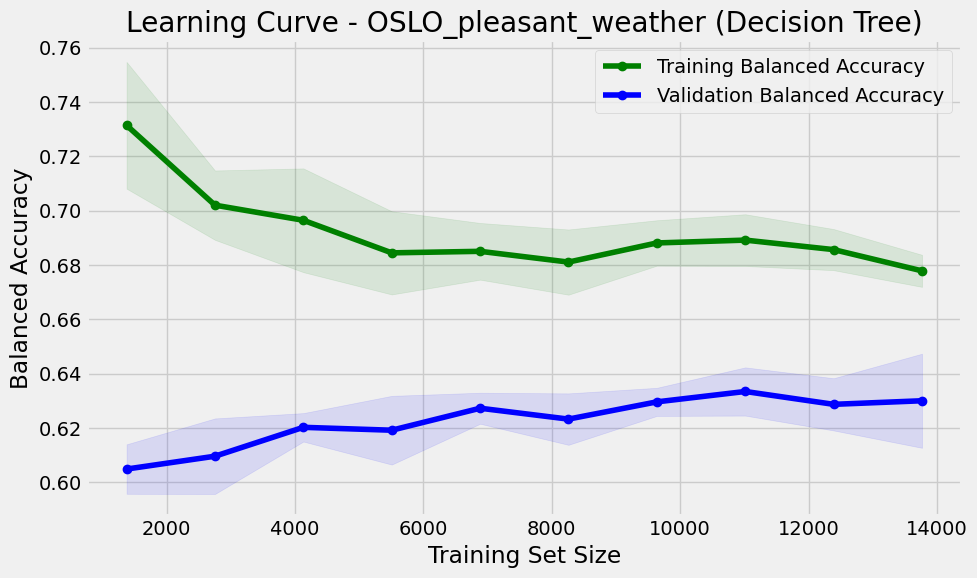

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier

# --- Model Setup: Use best parameters from GridSearchCV ---
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=20,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)

# --- Target column for BASEL ---
target_station_column = 'OSLO_pleasant_weather'
y_train_oslo = y_train[target_station_column].astype(int)

# --- Generate Learning Curves ---
train_sizes, train_scores, val_scores = learning_curve(
    dt_model,
    X_train_reduced,  # reduced feature set
    y_train_oslo,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# --- Compute mean and std deviation ---
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# --- Plot the learning curves ---
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='green', label='Training Balanced Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='green')

plt.plot(train_sizes, val_mean, 'o-', color='blue', label='Validation Balanced Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='blue')

plt.xlabel('Training Set Size')
plt.ylabel('Balanced Accuracy')
plt.title('Learning Curve - OSLO_pleasant_weather (Decision Tree)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 02.02 Stockholm weather station

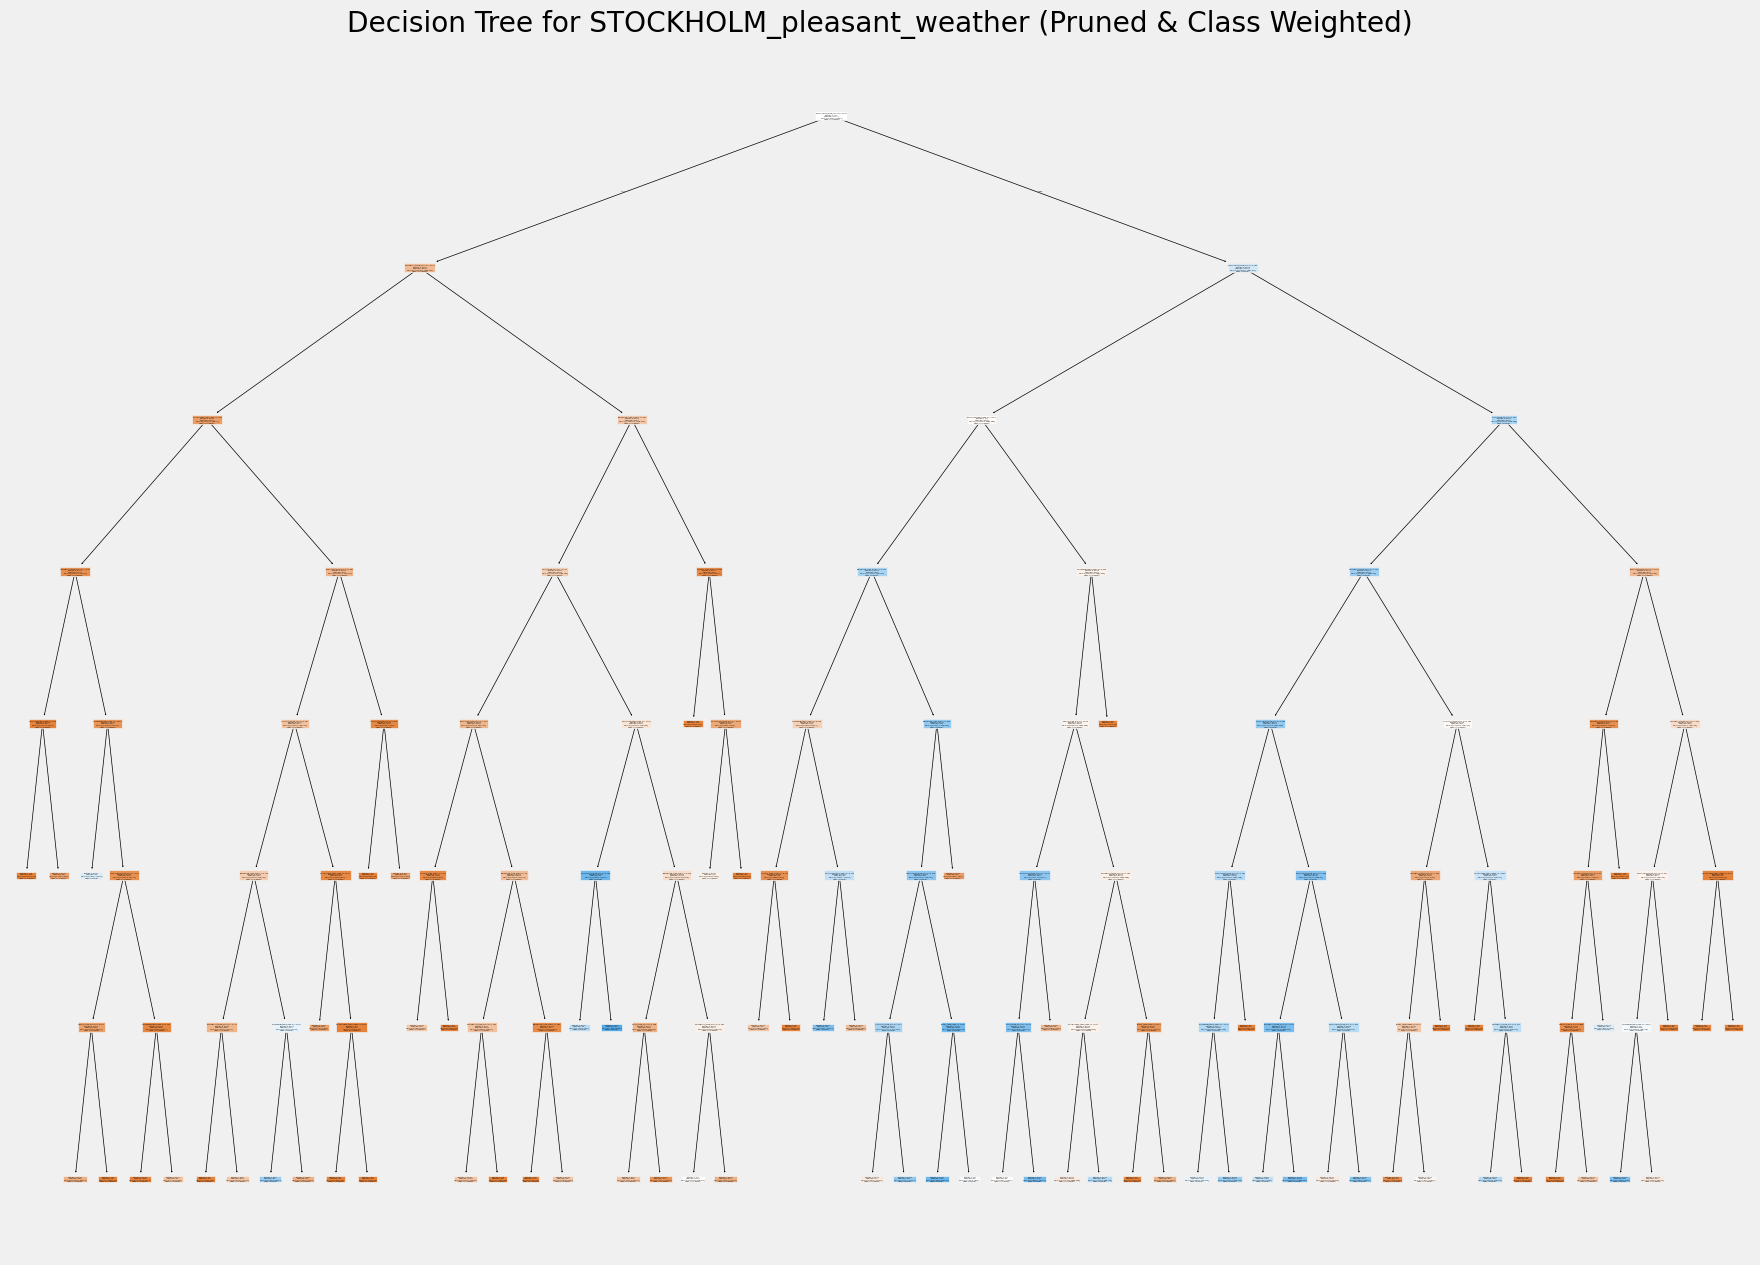

In [49]:
# We choose 'STOCKHOLM_pleasant_weather' as the target for this specific model
# class_weight='balanced' will handle the extreme class imbalance (~ 83.25/16.8 for STOCKHOLM in the answers dataset) during training

# IMPORTANT: Select one target column for both training and testing
target_station_column = 'STOCKHOLM_pleasant_weather' # Choose the target station
y_train_single_target = y_train[target_station_column].astype(int)
y_test_single_target = y_test[target_station_column].astype(int) # Note

# --- Train the model with adjusted parameters ---
best_dt = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=7, # Set max depth
                                    min_samples_split=2, # Set min samples to split
                                    min_samples_leaf=20, # Set min samples at leaf nodes
                                    class_weight='balanced', # Adjust class weights for imbalance
                                    random_state=42) # For reproducibility

# Fit the model using the single target column of scaled training data
best_dt.fit(X_train_reduced, y_train_single_target)

# Visualize the "pruned" Decision Tree
plt.figure(figsize=(20,15))
# class_names should reflect the binary labels of the chosen target column
plot_tree(best_dt, filled=True, feature_names=X_train_reduced.columns, class_names=['Unpleasant', 'Pleasant'])
plt.title(f"Decision Tree for {target_station_column} (Pruned & Class Weighted)")
plt.show()

#### Call the multi-output custom evaluation function

,Overall Accuracy,Recall (Pleasant),Precision (Pleasant),Specificity (Unpleasant),F1 Score (Pleasant),Balanced Accuracy,TP,FP,TN,FN
Dataset,,,,,,,,,,
Train,0.714369,0.585003,0.313055,0.740518,0.407854,0.662761,1693,3715,10602,1201
Test,0.707215,0.579000,0.315016,0.734276,0.408034,0.656638,579,1259,3479,421


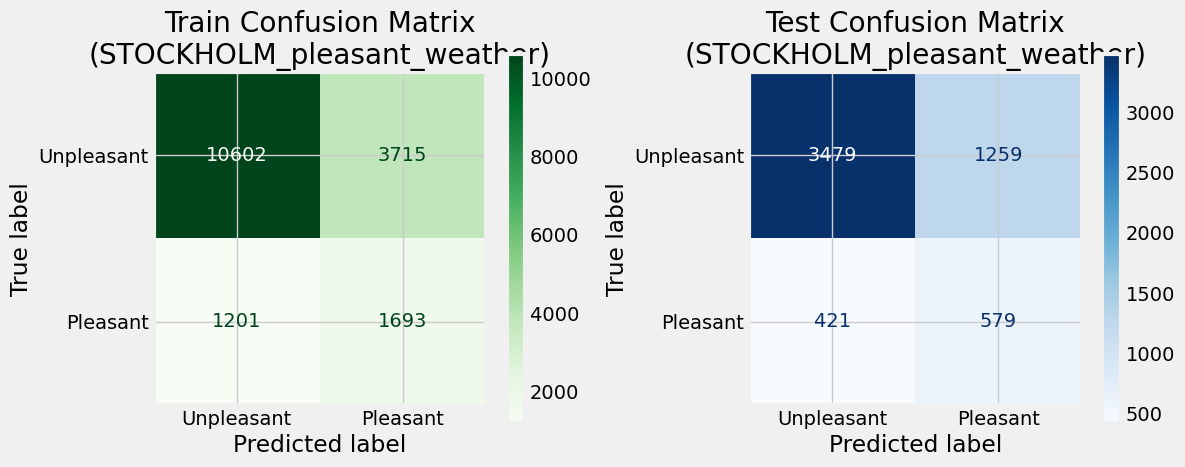

In [51]:
evaluate_model_per_station(
    model=best_dt,
    X_train=X_train_reduced,  # This uses the feature-reduced, z-score standardized differenced weather data
    y_train_df=y_train,       # This is the answers dataset
    X_test=X_test[X_train_reduced.columns],  # Reduce test set to same 26 columns
    y_test_df=y_test,
    station_column="STOCKHOLM_pleasant_weather"  # Change this to the relevant weather station target column
)

### Make comment.

#### Plot learning curves to assess likelihood of overfitting, underfitting or neither.  This uses learning_curve from sklearn.model_selection and evaluates the model across increasing training set sizes.

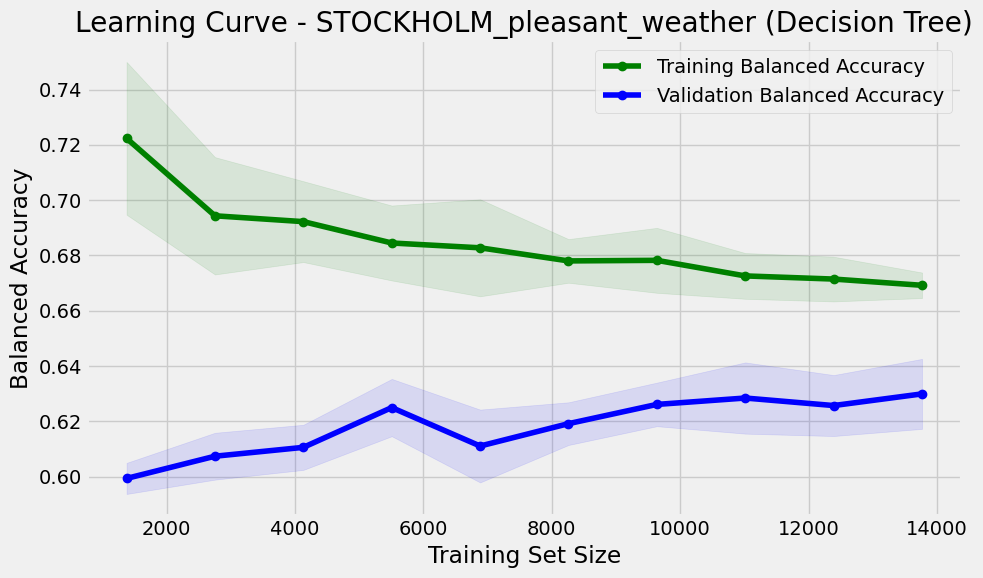

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier

# --- Model Setup: Use best parameters from GridSearchCV ---
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=20,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)

# --- Target column for BASEL ---
target_station_column = 'STOCKHOLM_pleasant_weather'
y_train_stockholm = y_train[target_station_column].astype(int)

# --- Generate Learning Curves ---
train_sizes, train_scores, val_scores = learning_curve(
    dt_model,
    X_train_reduced,  # reduced feature set
    y_train_stockholm,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# --- Compute mean and std deviation ---
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# --- Plot the learning curves ---
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='green', label='Training Balanced Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='green')

plt.plot(train_sizes, val_mean, 'o-', color='blue', label='Validation Balanced Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='blue')

plt.xlabel('Training Set Size')
plt.ylabel('Balanced Accuracy')
plt.title('Learning Curve - STOCKHOLM_pleasant_weather (Decision Tree)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 02.03 Budapest weather station

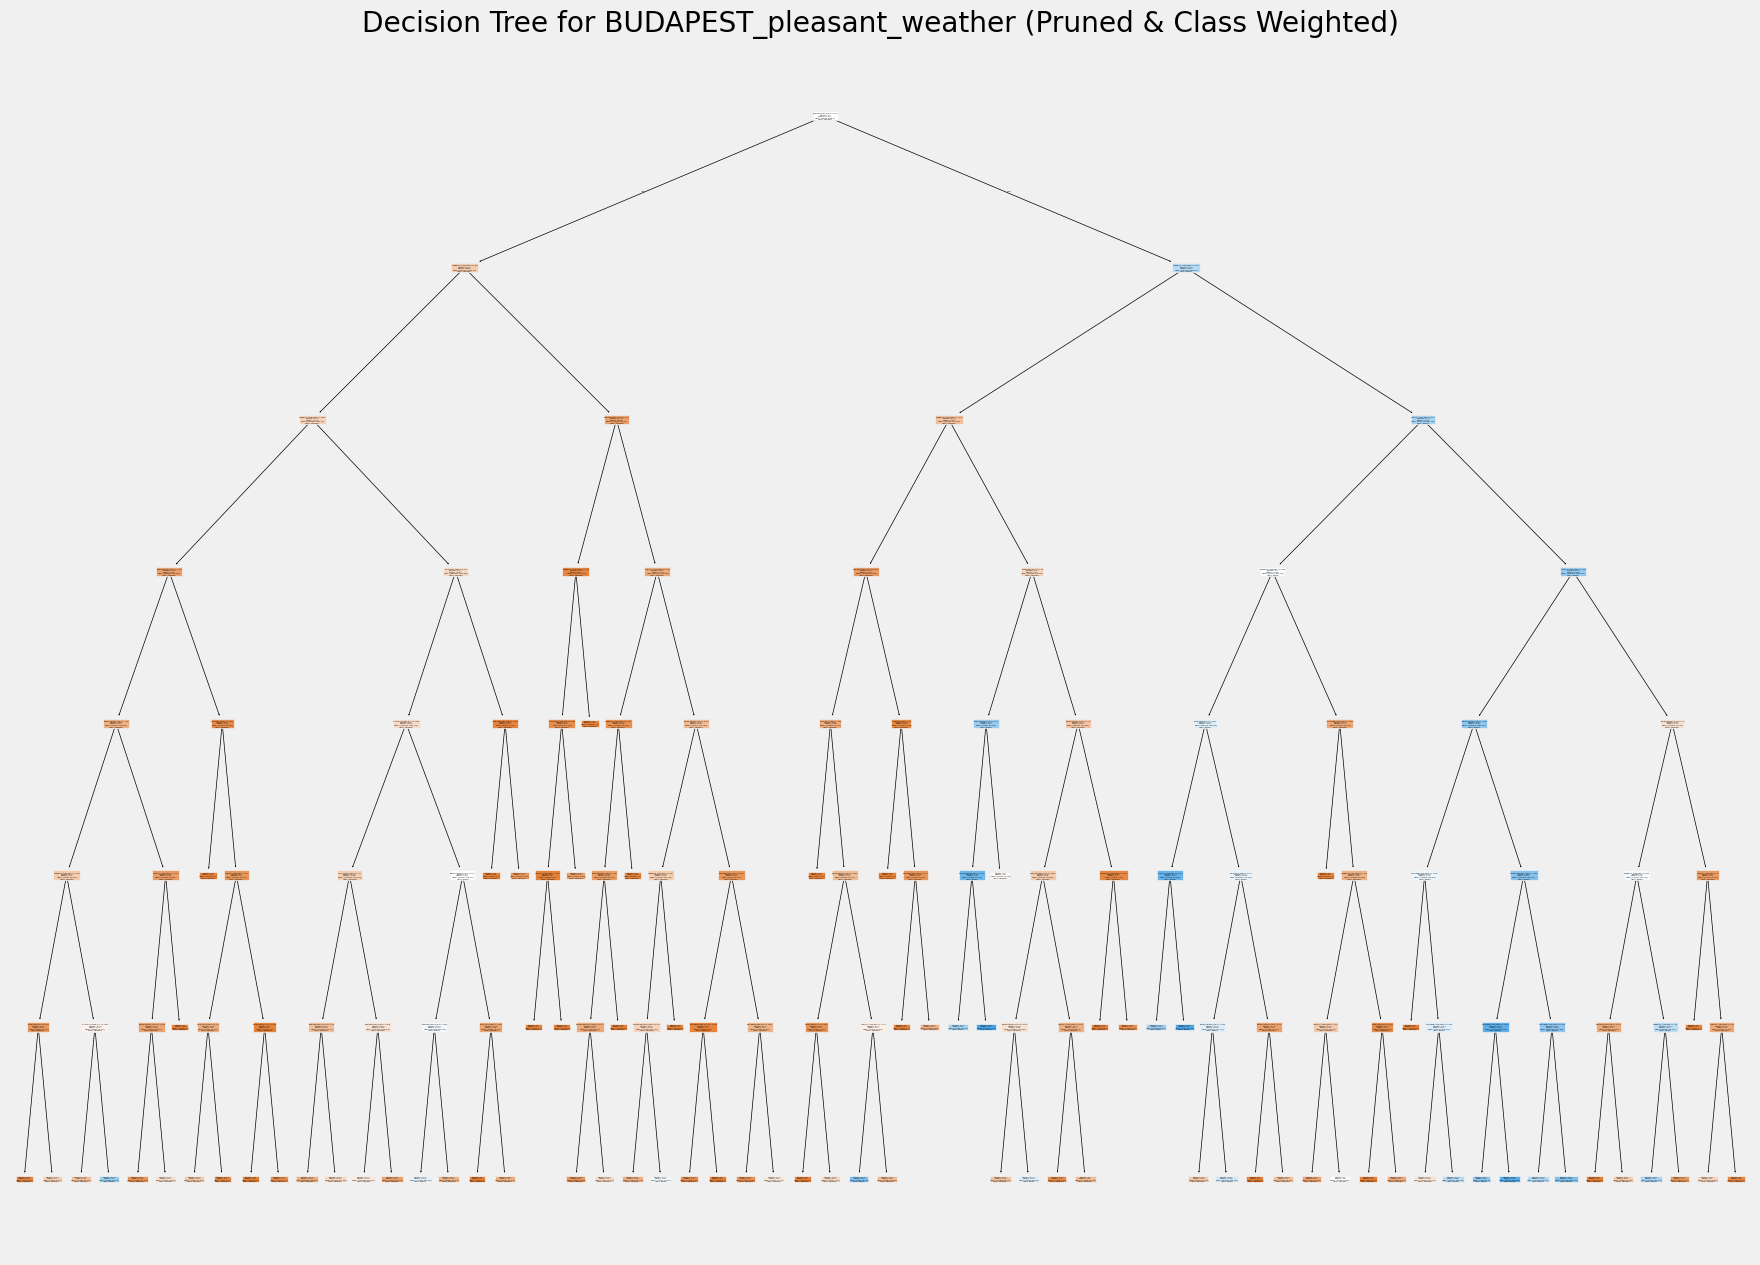

In [64]:
# We choose 'BUDAPEST_pleasant_weather' as the target for this specific model
# class_weight='balanced' will handle the class imbalance (~ 67.5/32.5 for BUDAPEST in the answers dataset) during training

# IMPORTANT: Select one target column for both training and testing
target_station_column = 'BUDAPEST_pleasant_weather' # Choose the target station
y_train_single_target = y_train[target_station_column].astype(int)
y_test_single_target = y_test[target_station_column].astype(int) # Note

# --- Train the model with adjusted parameters ---
best_dt = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=7, # Set max depth
                                    min_samples_split=2, # Set min samples to split
                                    min_samples_leaf=20, # Set min samples at leaf nodes
                                    class_weight='balanced', # Adjust class weights for imbalance
                                    random_state=42) # For reproducibility

# Fit the model using the single target column of scaled training data
best_dt.fit(X_train_reduced, y_train_single_target)

# Visualize the "pruned" Decision Tree
plt.figure(figsize=(20,15))
# class_names should reflect the binary labels of the chosen target column
plot_tree(best_dt, filled=True, feature_names=X_train_reduced.columns, class_names=['Unpleasant', 'Pleasant'])
plt.title(f"Decision Tree for {target_station_column} (Pruned & Class Weighted)")
plt.show()

#### Call the multi-output custom evaluation function

,Overall Accuracy,Recall (Pleasant),Precision (Pleasant),Specificity (Unpleasant),F1 Score (Pleasant),Balanced Accuracy,TP,FP,TN,FN
Dataset,,,,,,,,,,
Train,0.656905,0.718096,0.480940,0.627495,0.576064,0.672795,4012,4330,7294,1575
Test,0.642384,0.681670,0.461793,0.623780,0.550591,0.652725,1257,1465,2429,587


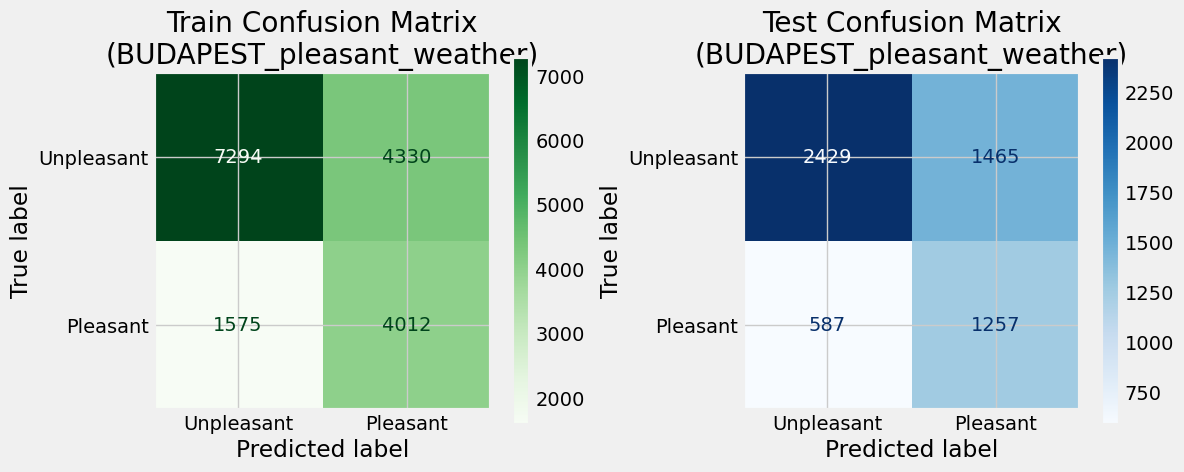

In [66]:
evaluate_model_per_station(
    model=best_dt,
    X_train=X_train_reduced,  # This uses the feature-reduced, z-score standardized differenced weather data
    y_train_df=y_train,       # This is the answers dataset
    X_test=X_test[X_train_reduced.columns],  # Reduce test set to same 26 columns
    y_test_df=y_test,
    station_column="BUDAPEST_pleasant_weather"  # Change this to the relevant weather station target column
)

### Make comment.

#### Plot learning curves to assess likelihood of overfitting, underfitting or neither.  This uses learning_curve from sklearn.model_selection and evaluates the model across increasing training set sizes.

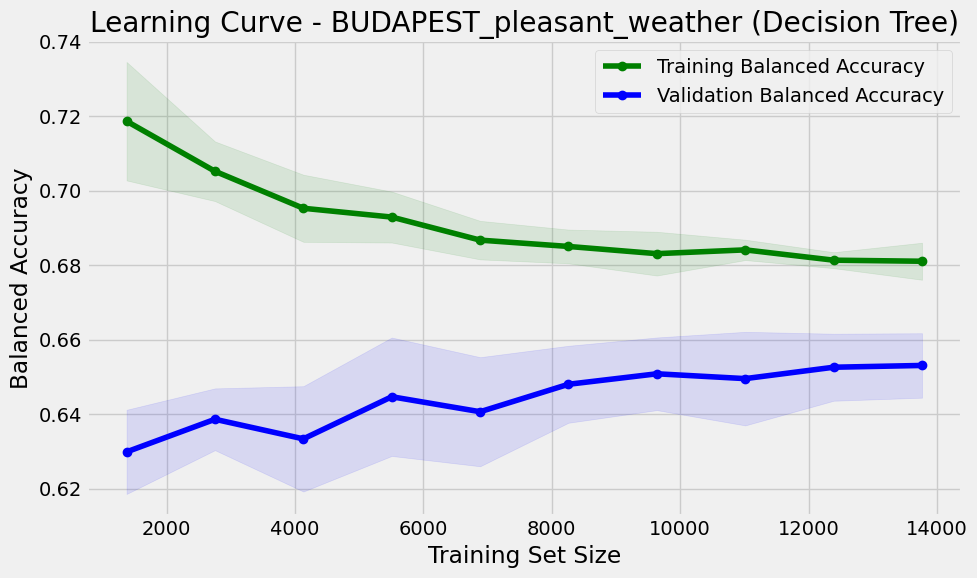

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier

# --- Model Setup: Use best parameters from GridSearchCV ---
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=20,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)

# --- Target column for BASEL ---
target_station_column = 'BUDAPEST_pleasant_weather'
y_train_budapest = y_train[target_station_column].astype(int)

# --- Generate Learning Curves ---
train_sizes, train_scores, val_scores = learning_curve(
    dt_model,
    X_train_reduced,  # reduced feature set
    y_train_budapest,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# --- Compute mean and std deviation ---
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# --- Plot the learning curves ---
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='green', label='Training Balanced Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='green')

plt.plot(train_sizes, val_mean, 'o-', color='blue', label='Validation Balanced Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='blue')

plt.xlabel('Training Set Size')
plt.ylabel('Balanced Accuracy')
plt.title('Learning Curve - BUDAPEST_pleasant_weather (Decision Tree)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 02.04 Debilt weather station

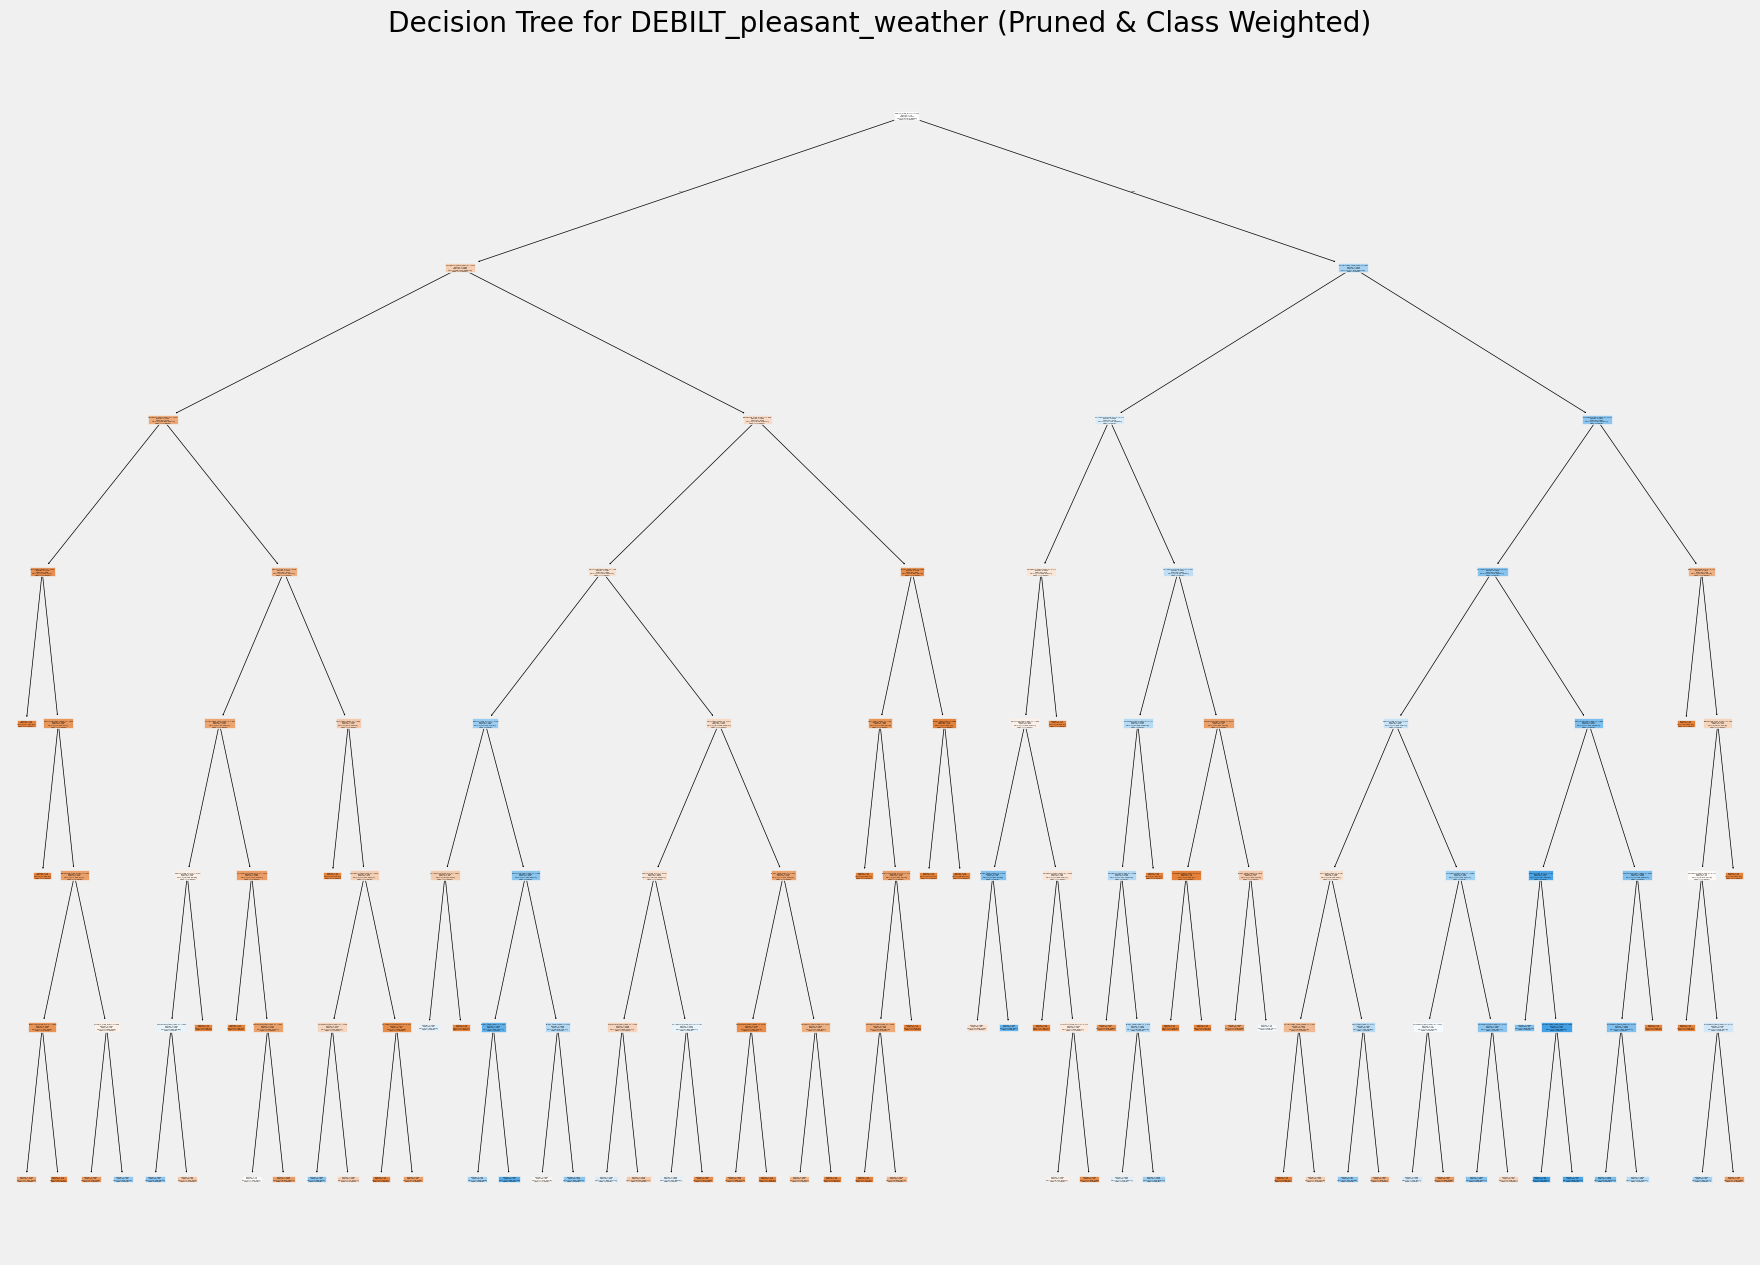

In [83]:
# We choose 'DEBILT_pleasant_weather' as the target for this specific model
# class_weight='balanced' will handle the extreme class imbalance (~ 80.7/19.3 for DEBILT in the answers dataset) during training

# IMPORTANT: Select one target column for both training and testing
target_station_column = 'DEBILT_pleasant_weather' # Choose the target station
y_train_single_target = y_train[target_station_column].astype(int)
y_test_single_target = y_test[target_station_column].astype(int) # Note

# --- Train the model with adjusted parameters ---
best_dt = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=7, # Set max depth
                                    min_samples_split=2, # Set min samples to split
                                    min_samples_leaf=20, # Set min samples at leaf nodes
                                    class_weight='balanced', # Adjust class weights for imbalance
                                    random_state=42) # For reproducibility

# Fit the model using the single target column of scaled training data
best_dt.fit(X_train_reduced, y_train_single_target)

# Visualize the "pruned" Decision Tree
plt.figure(figsize=(20,15))
# class_names should reflect the binary labels of the chosen target column
plot_tree(best_dt, filled=True, feature_names=X_train_reduced.columns, class_names=['Unpleasant', 'Pleasant'])
plt.title(f"Decision Tree for {target_station_column} (Pruned & Class Weighted)")
plt.show()

#### Call the multi-output custom evaluation function

,Overall Accuracy,Recall (Pleasant),Precision (Pleasant),Specificity (Unpleasant),F1 Score (Pleasant),Balanced Accuracy,TP,FP,TN,FN
Dataset,,,,,,,,,,
Train,0.657603,0.722139,0.326099,0.642126,0.449304,0.682133,2404,4968,8914,925
Test,0.632276,0.679646,0.305246,0.620660,0.421284,0.650153,768,1748,2860,362


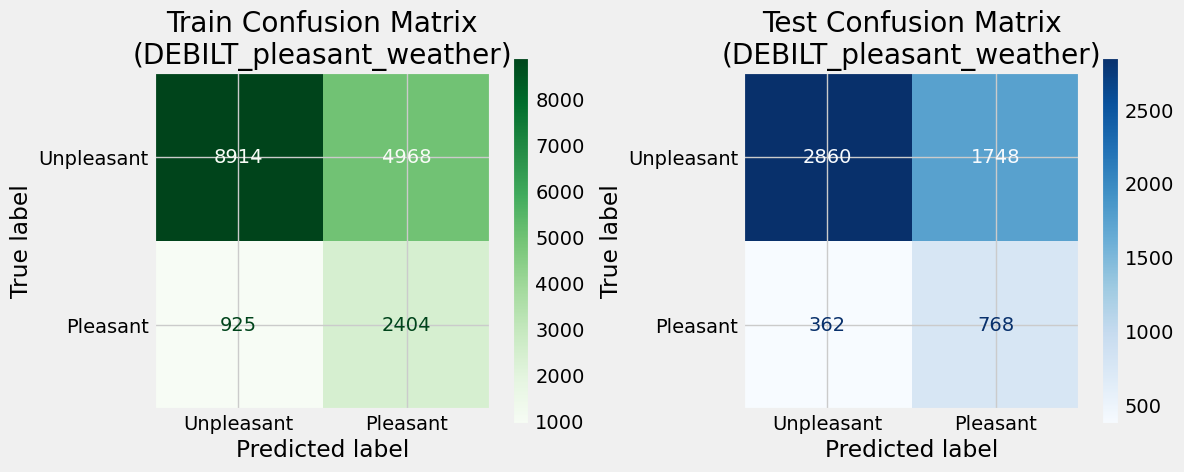

In [85]:
evaluate_model_per_station(
    model=best_dt,
    X_train=X_train_reduced,  # This uses the feature-reduced, z-score standardized differenced weather data
    y_train_df=y_train,       # This is the answers dataset
    X_test=X_test[X_train_reduced.columns],  # Reduce test set to same 26 columns
    y_test_df=y_test,
    station_column="DEBILT_pleasant_weather"  # Change this to the relevant weather station target column
)

### Make comment.

#### Plot learning curves to assess likelihood of overfitting, underfitting or neither.  This uses learning_curve from sklearn.model_selection and evaluates the model across increasing training set sizes.

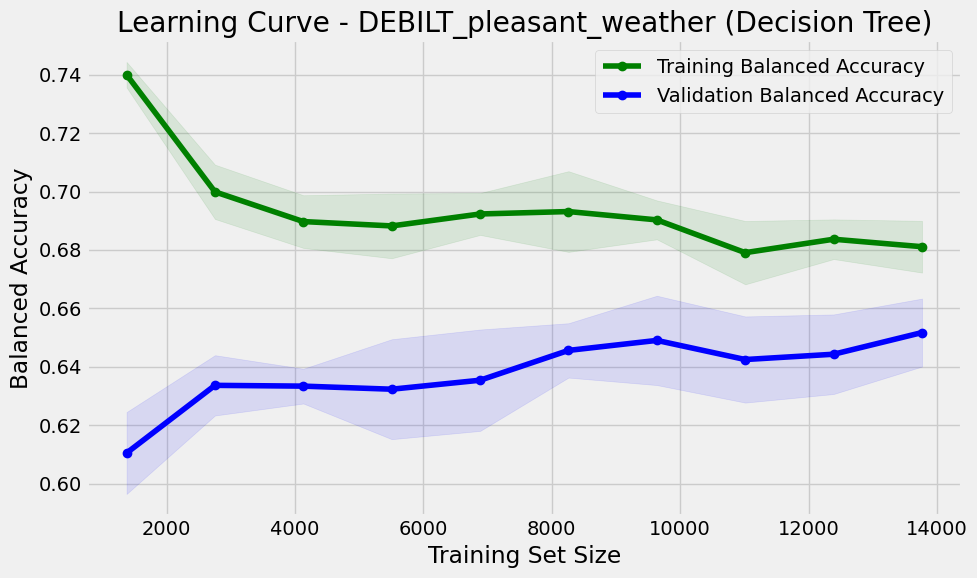

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier

# --- Model Setup: Use best parameters from GridSearchCV ---
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=20,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)

# --- Target column for DEBILT ---
target_station_column = 'DEBILT_pleasant_weather'
y_train_debilt = y_train[target_station_column].astype(int)

# --- Generate Learning Curves ---
train_sizes, train_scores, val_scores = learning_curve(
    dt_model,
    X_train_reduced,  # reduced feature set
    y_train_debilt,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# --- Compute mean and std deviation ---
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# --- Plot the learning curves ---
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='green', label='Training Balanced Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='green')

plt.plot(train_sizes, val_mean, 'o-', color='blue', label='Validation Balanced Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='blue')

plt.xlabel('Training Set Size')
plt.ylabel('Balanced Accuracy')
plt.title('Learning Curve - DEBILT_pleasant_weather (Decision Tree)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 02.05 Dusseldorf weather station

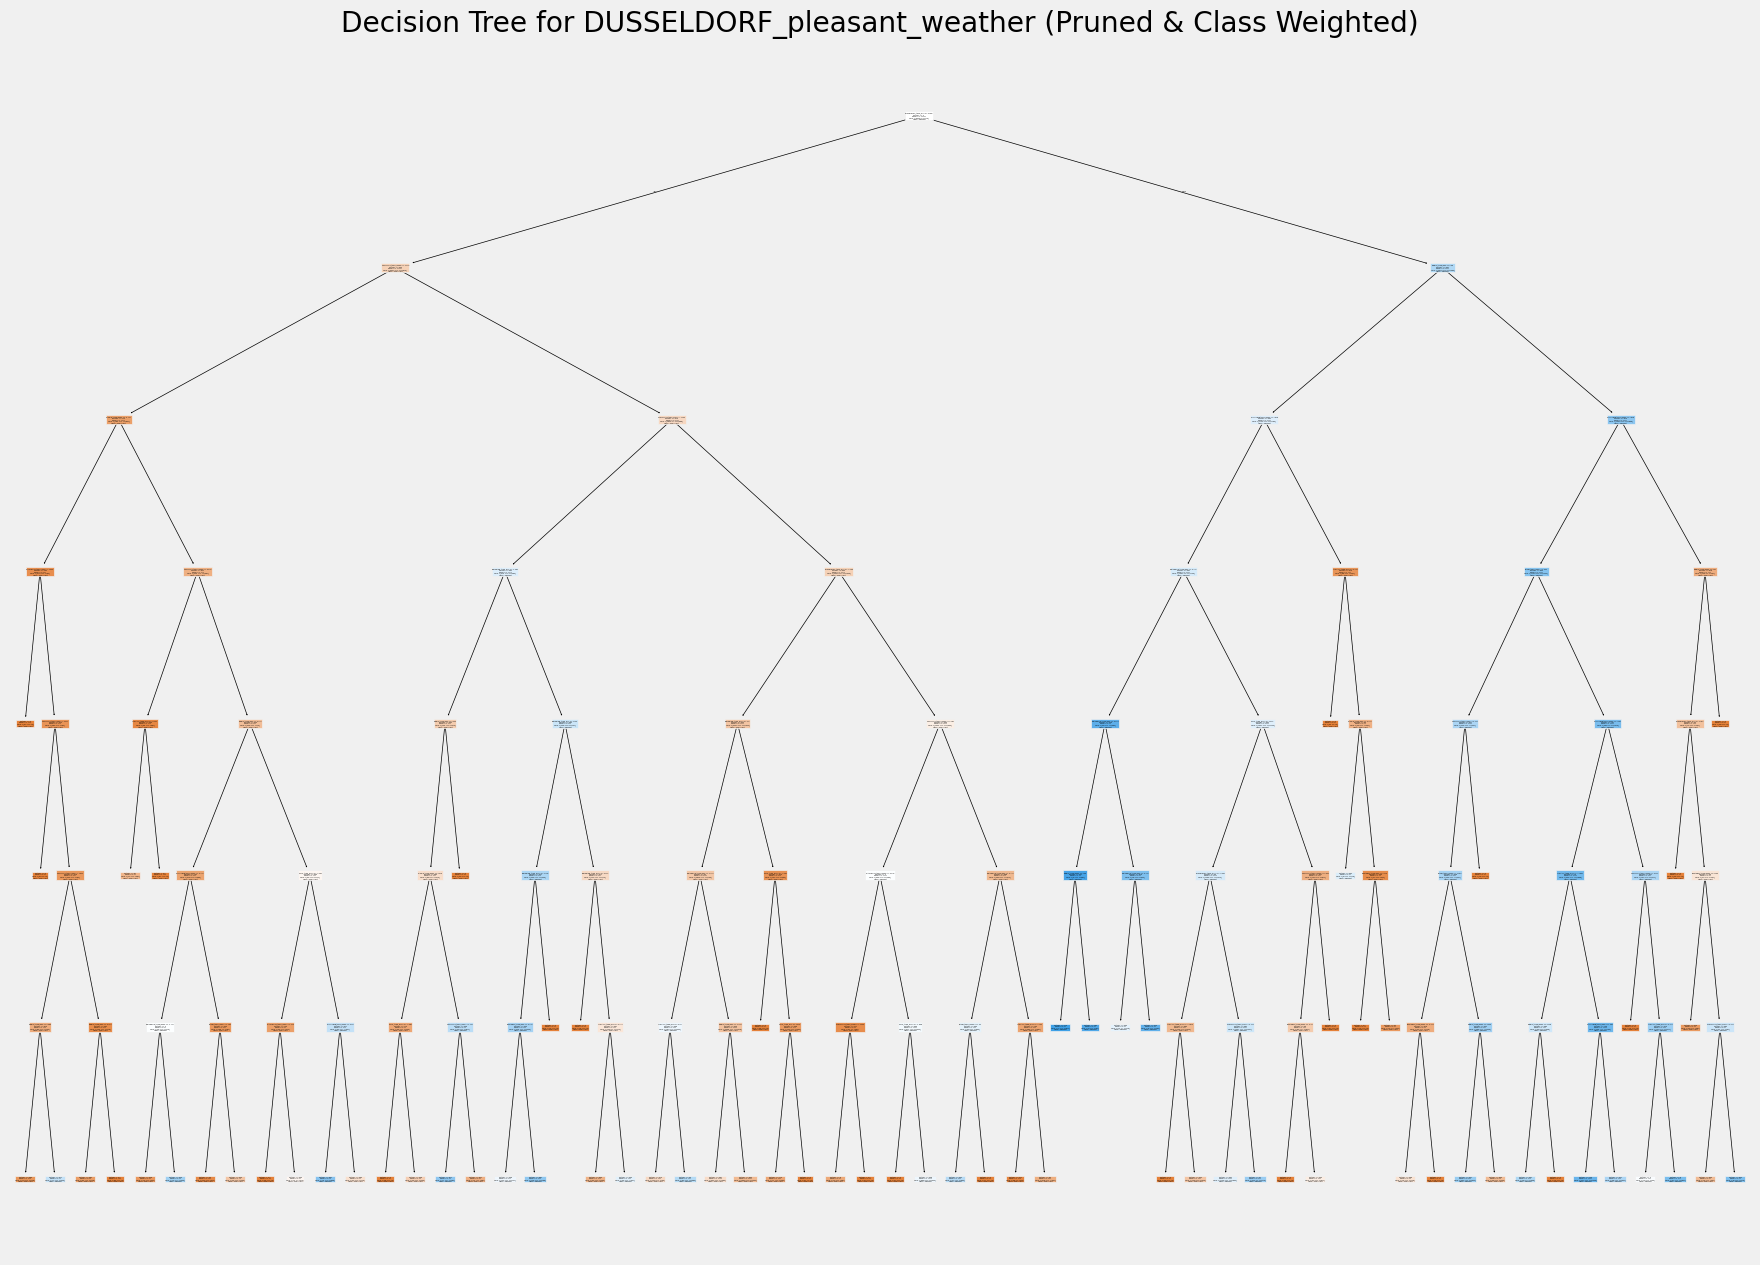

In [91]:
# We choose 'DUSSELDORF_pleasant_weather' as the target for this specific model
# class_weight='balanced' will handle the extreme class imbalance (~ 78.7/21.3 for DUSSELDORF in the answers dataset) during training

# IMPORTANT: Select one target column for both training and testing
target_station_column = 'DUSSELDORF_pleasant_weather' # Choose the target station
y_train_single_target = y_train[target_station_column].astype(int)
y_test_single_target = y_test[target_station_column].astype(int) # Note

# --- Train the model with adjusted parameters ---
best_dt = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=7, # Set max depth
                                    min_samples_split=2, # Set min samples to split
                                    min_samples_leaf=20, # Set min samples at leaf nodes
                                    class_weight='balanced', # Adjust class weights for imbalance
                                    random_state=42) # For reproducibility

# Fit the model using the single target column of scaled training data
best_dt.fit(X_train_reduced, y_train_single_target)

# Visualize the "pruned" Decision Tree
plt.figure(figsize=(20,15))
# class_names should reflect the binary labels of the chosen target column
plot_tree(best_dt, filled=True, feature_names=X_train_reduced.columns, class_names=['Unpleasant', 'Pleasant'])
plt.title(f"Decision Tree for {target_station_column} (Pruned & Class Weighted)")
plt.show()

#### Call the multi-output custom evaluation function

,Overall Accuracy,Recall (Pleasant),Precision (Pleasant),Specificity (Unpleasant),F1 Score (Pleasant),Balanced Accuracy,TP,FP,TN,FN
Dataset,,,,,,,,,,
Train,0.606124,0.786220,0.325076,0.557279,0.459970,0.671750,2887,5994,7545,785
Test,0.582433,0.742472,0.311503,0.537310,0.438876,0.639891,937,2071,2405,325


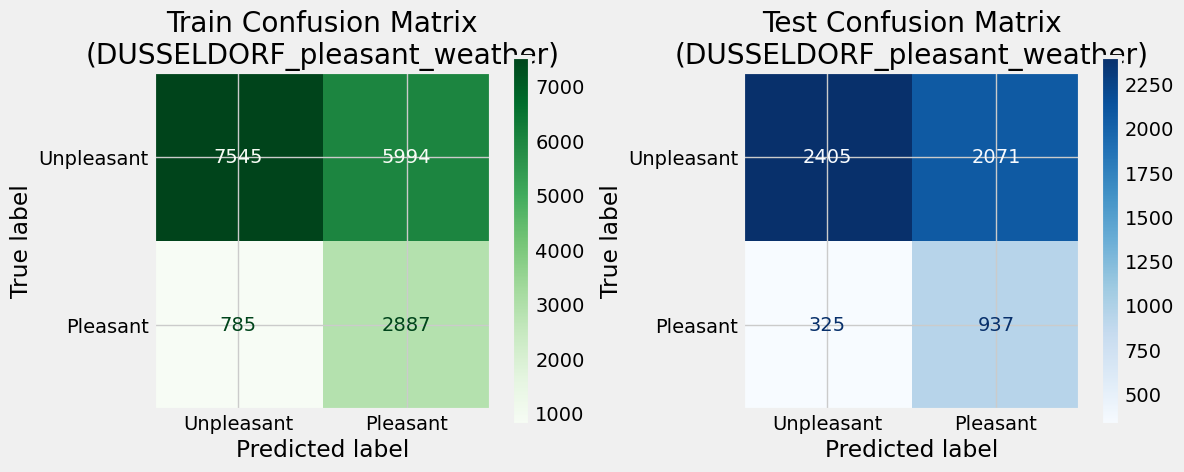

In [93]:
evaluate_model_per_station(
    model=best_dt,
    X_train=X_train_reduced,  # This uses the feature-reduced, z-score standardized differenced weather data
    y_train_df=y_train,       # This is the answers dataset
    X_test=X_test[X_train_reduced.columns],  # Reduce test set to same 26 columns
    y_test_df=y_test,
    station_column="DUSSELDORF_pleasant_weather"  # Change this to the relevant weather station target column
)

### Make comment.

#### Plot learning curves to assess likelihood of overfitting, underfitting or neither.  This uses learning_curve from sklearn.model_selection and evaluates the model across increasing training set sizes.

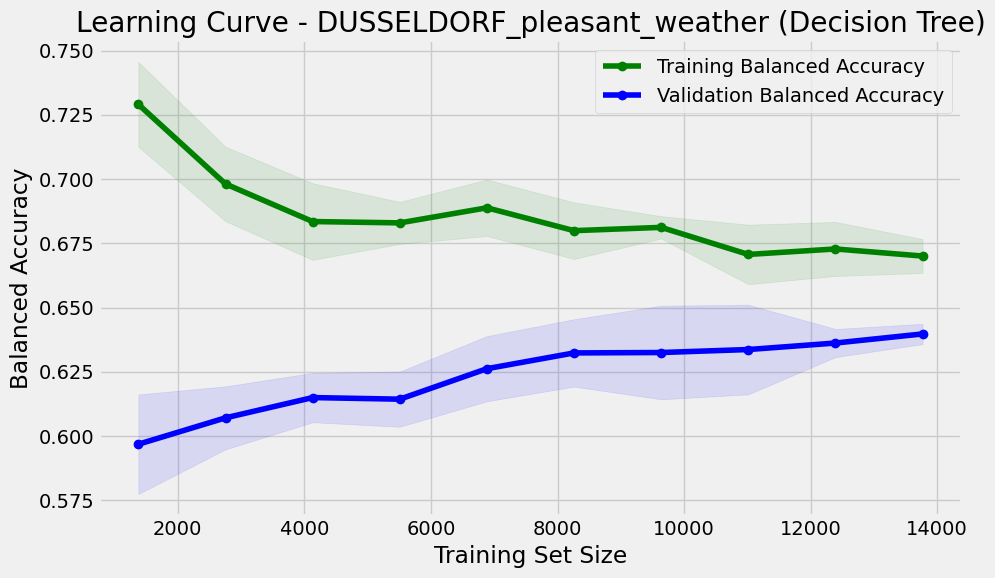

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier

# --- Model Setup: Use best parameters from GridSearchCV ---
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=20,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)

# --- Target column for DUSSELDORF ---
target_station_column = 'DUSSELDORF_pleasant_weather'
y_train_dusseldorf = y_train[target_station_column].astype(int)

# --- Generate Learning Curves ---
train_sizes, train_scores, val_scores = learning_curve(
    dt_model,
    X_train_reduced,  # reduced feature set
    y_train_dusseldorf,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# --- Compute mean and std deviation ---
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# --- Plot the learning curves ---
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='green', label='Training Balanced Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='green')

plt.plot(train_sizes, val_mean, 'o-', color='blue', label='Validation Balanced Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='blue')

plt.xlabel('Training Set Size')
plt.ylabel('Balanced Accuracy')
plt.title('Learning Curve - DUSSELDORF_pleasant_weather (Decision Tree)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 02.06 MunchenB weather station

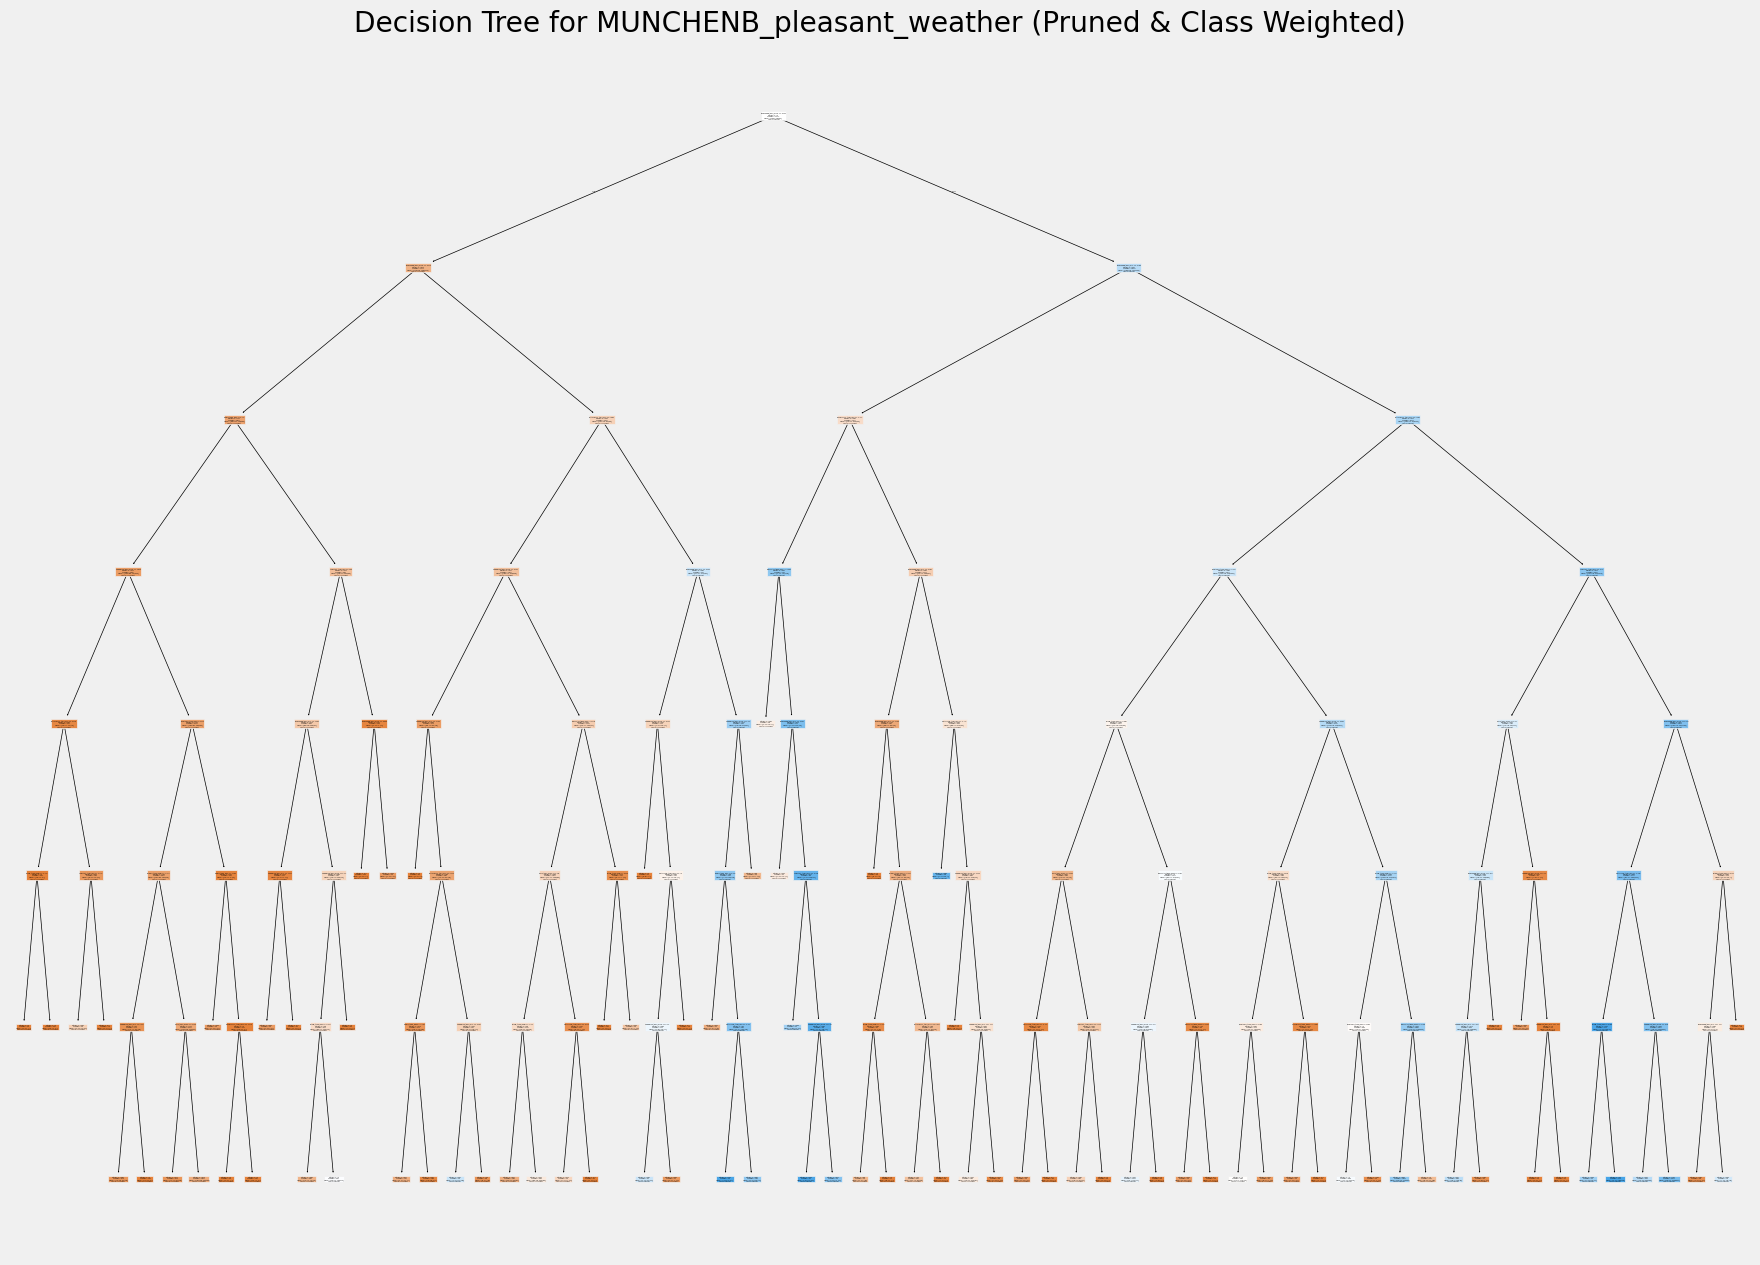

In [98]:
# We choose 'MUNCHENB_pleasant_weather' as the target for this specific model
# class_weight='balanced' will handle the extreme class imbalance (~ 79.3/20.7 for MUNCHENB in the answers dataset) during training

# IMPORTANT: Select one target column for both training and testing
target_station_column = 'MUNCHENB_pleasant_weather' # Choose the target station
y_train_single_target = y_train[target_station_column].astype(int)
y_test_single_target = y_test[target_station_column].astype(int) # Note

# --- Train the model with adjusted parameters ---
best_dt = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=7, # Set max depth
                                    min_samples_split=2, # Set min samples to split
                                    min_samples_leaf=20, # Set min samples at leaf nodes
                                    class_weight='balanced', # Adjust class weights for imbalance
                                    random_state=42) # For reproducibility

# Fit the model using the single target column of scaled training data
best_dt.fit(X_train_reduced, y_train_single_target)

# Visualize the "pruned" Decision Tree
plt.figure(figsize=(20,15))
# class_names should reflect the binary labels of the chosen target column
plot_tree(best_dt, filled=True, feature_names=X_train_reduced.columns, class_names=['Unpleasant', 'Pleasant'])
plt.title(f"Decision Tree for {target_station_column} (Pruned & Class Weighted)")
plt.show()

#### Call the multi-output custom evaluation function

,Overall Accuracy,Recall (Pleasant),Precision (Pleasant),Specificity (Unpleasant),F1 Score (Pleasant),Balanced Accuracy,TP,FP,TN,FN
Dataset,,,,,,,,,,
Train,0.651211,0.786977,0.34841,0.615768,0.482990,0.701373,2804,5244,8404,759
Test,0.626351,0.755814,0.32971,0.591972,0.459132,0.673893,910,1850,2684,294


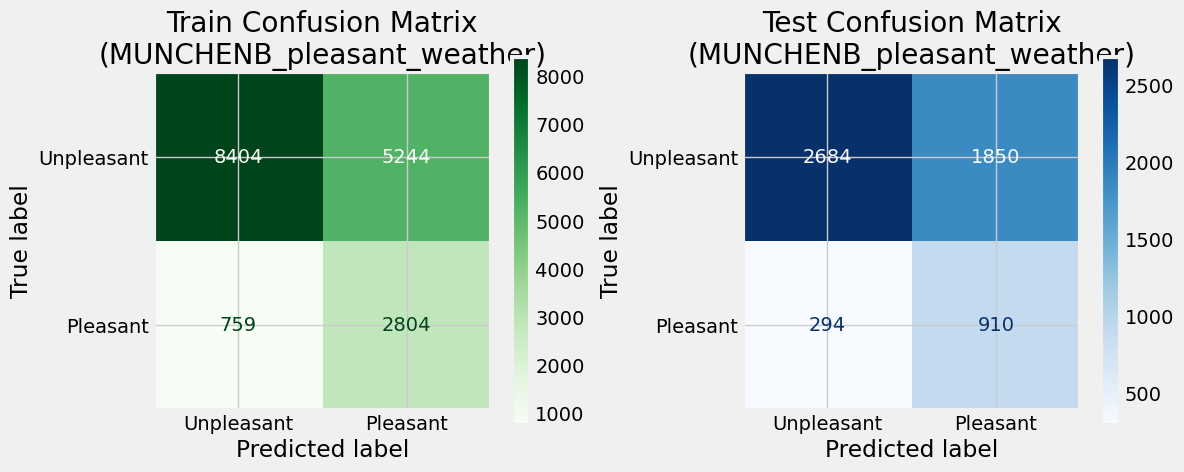

In [100]:
evaluate_model_per_station(
    model=best_dt,
    X_train=X_train_reduced,  # This uses the feature-reduced, z-score standardized differenced weather data
    y_train_df=y_train,       # This is the answers dataset
    X_test=X_test[X_train_reduced.columns],  # Reduce test set to same 26 columns
    y_test_df=y_test,
    station_column="MUNCHENB_pleasant_weather"  # Change this to the relevant weather station target column
)

### Make comment.

#### Plot learning curves to assess likelihood of overfitting, underfitting or neither.  This uses learning_curve from sklearn.model_selection and evaluates the model across increasing training set sizes.

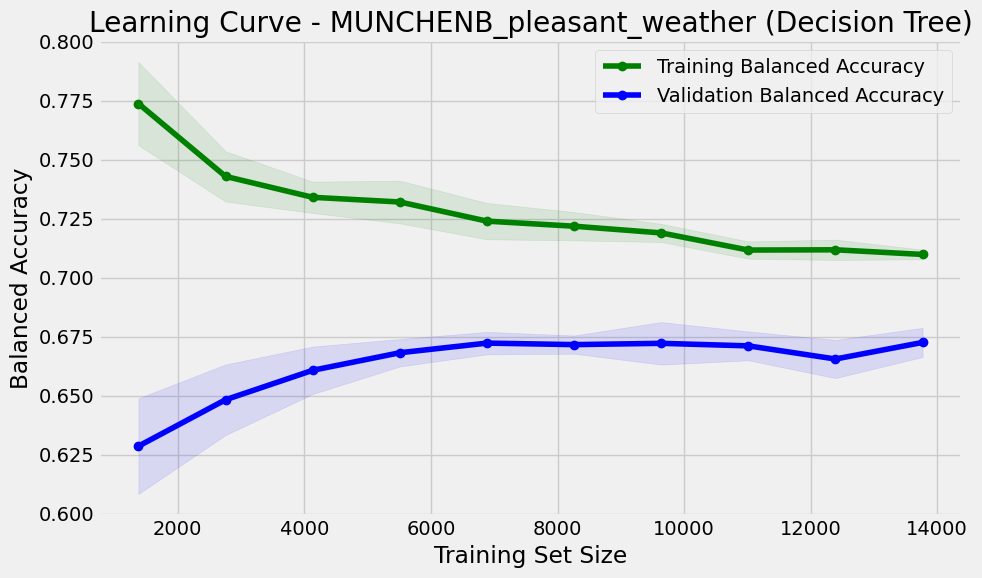

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier

# --- Model Setup: Use best parameters from GridSearchCV ---
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=20,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)

# --- Target column for MUNCHENB ---
target_station_column = 'MUNCHENB_pleasant_weather'
y_train_munchenb = y_train[target_station_column].astype(int)

# --- Generate Learning Curves ---
train_sizes, train_scores, val_scores = learning_curve(
    dt_model,
    X_train_reduced,  # reduced feature set
    y_train_munchenb,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# --- Compute mean and std deviation ---
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# --- Plot the learning curves ---
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='green', label='Training Balanced Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='green')

plt.plot(train_sizes, val_mean, 'o-', color='blue', label='Validation Balanced Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='blue')

plt.xlabel('Training Set Size')
plt.ylabel('Balanced Accuracy')
plt.title('Learning Curve - MUNCHENB_pleasant_weather (Decision Tree)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 02.07 Belgrade weather station

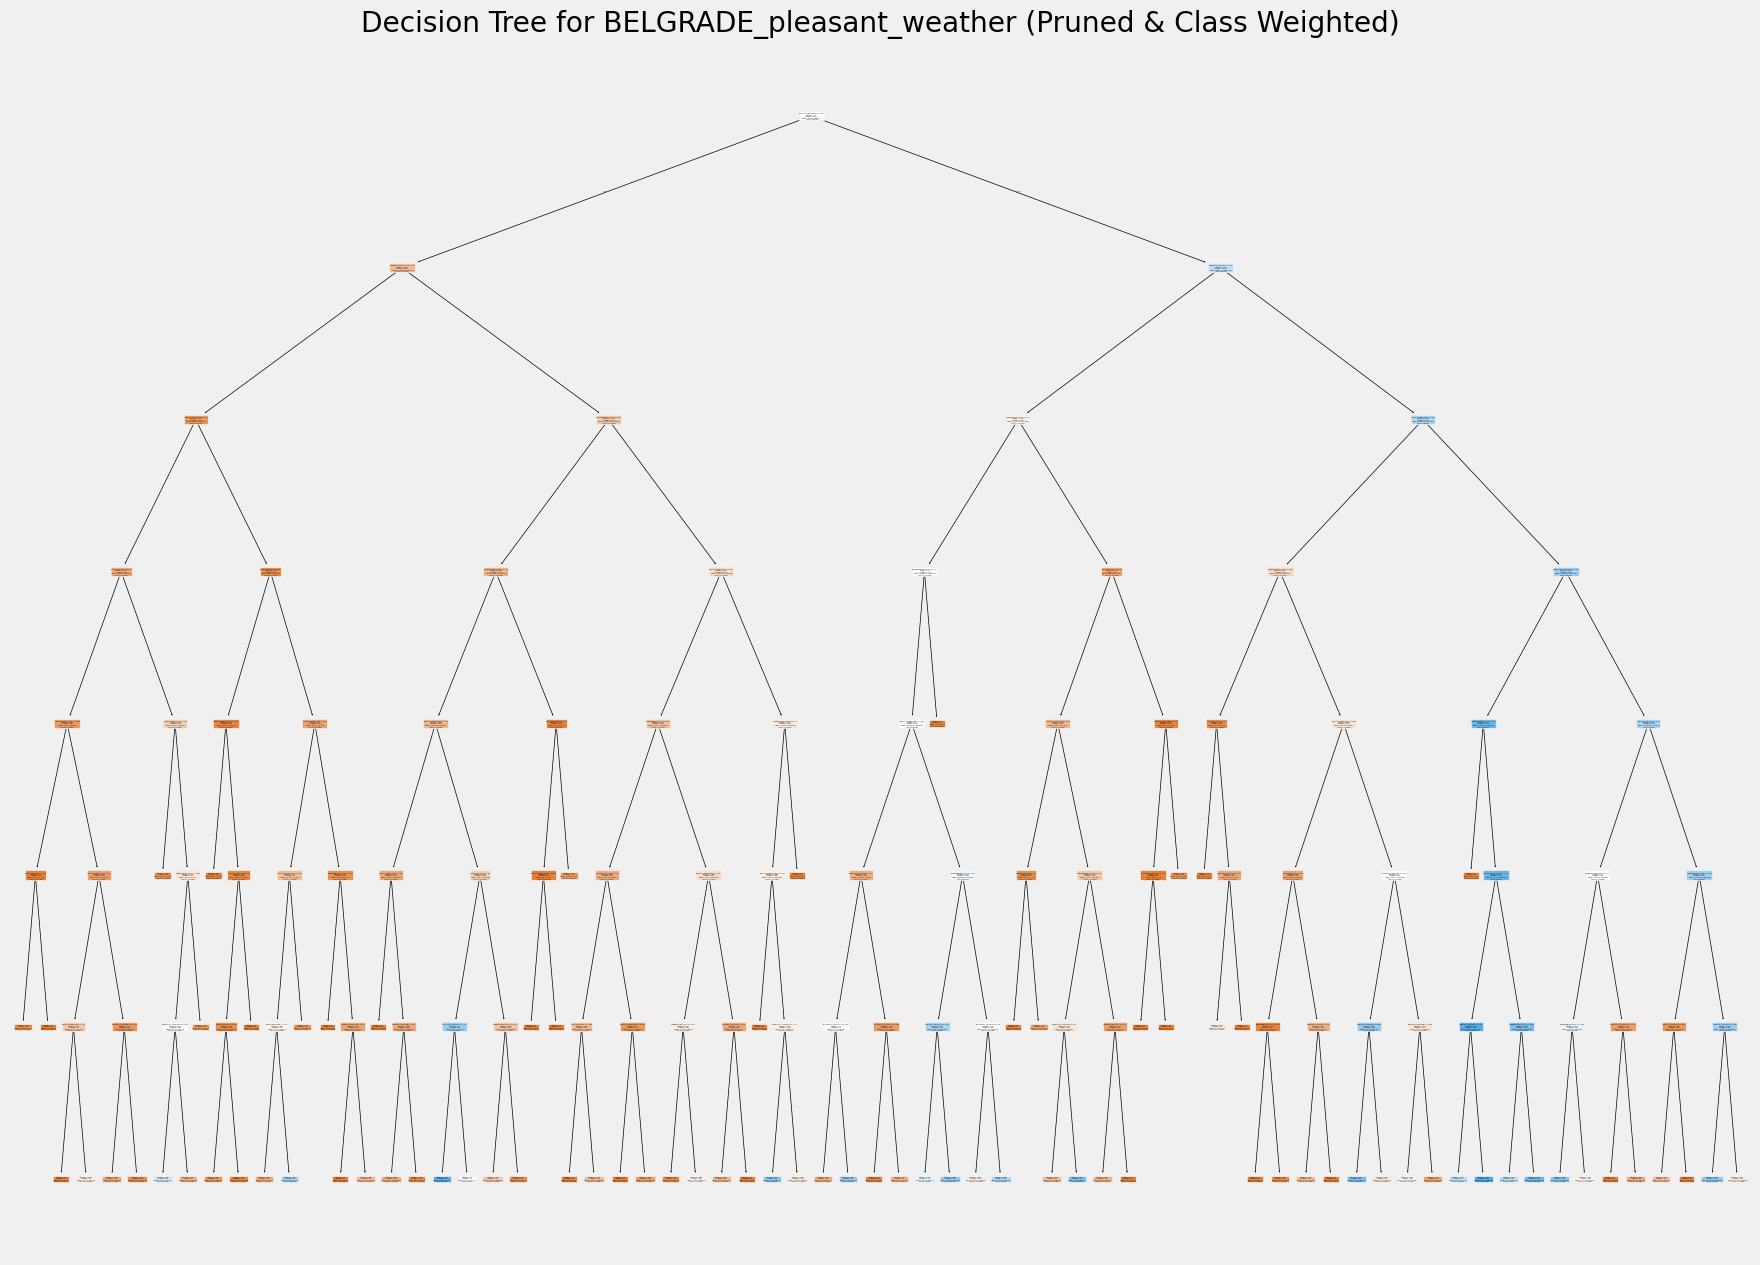

In [105]:
# We choose 'BELGRADE_pleasant_weather' as the target for this specific model
# class_weight='balanced' will handle the class imbalance (~ 65.2/34.8 for BELGRADE in the answers dataset) during training

# IMPORTANT: Select one target column for both training and testing
target_station_column = 'BELGRADE_pleasant_weather' # Choose the target station
y_train_single_target = y_train[target_station_column].astype(int)
y_test_single_target = y_test[target_station_column].astype(int) # Note

# --- Train the model with adjusted parameters ---
best_dt = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=7, # Set max depth
                                    min_samples_split=2, # Set min samples to split
                                    min_samples_leaf=20, # Set min samples at leaf nodes
                                    class_weight='balanced', # Adjust class weights for imbalance
                                    random_state=42) # For reproducibility

# Fit the model using the single target column of scaled training data
best_dt.fit(X_train_reduced, y_train_single_target)

# Visualize the "pruned" Decision Tree
plt.figure(figsize=(20,15))
# class_names should reflect the binary labels of the chosen target column
plot_tree(best_dt, filled=True, feature_names=X_train_reduced.columns, class_names=['Unpleasant', 'Pleasant'])
plt.title(f"Decision Tree for {target_station_column} (Pruned & Class Weighted)")
plt.show()

#### Call the multi-output custom evaluation function

,Overall Accuracy,Recall (Pleasant),Precision (Pleasant),Specificity (Unpleasant),F1 Score (Pleasant),Balanced Accuracy,TP,FP,TN,FN
Dataset,,,,,,,,,,
Train,0.695950,0.609044,0.558104,0.742378,0.582462,0.675711,3650,2890,8328,2343
Test,0.678459,0.578289,0.535681,0.732014,0.556170,0.655152,1156,1002,2737,843


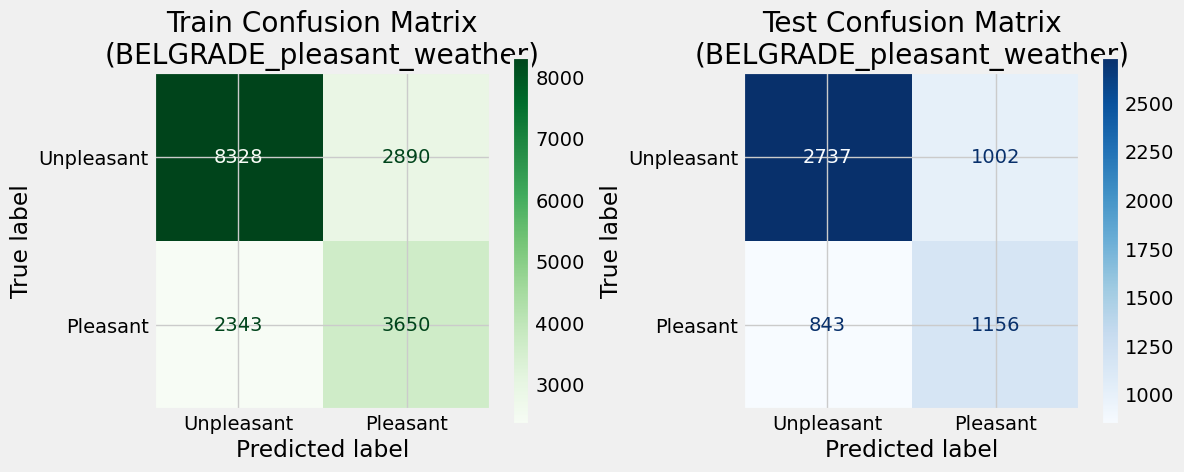

In [107]:
evaluate_model_per_station(
    model=best_dt,
    X_train=X_train_reduced,  # This uses the feature-reduced, z-score standardized differenced weather data
    y_train_df=y_train,       # This is the answers dataset
    X_test=X_test[X_train_reduced.columns],  # Reduce test set to same 26 columns
    y_test_df=y_test,
    station_column="BELGRADE_pleasant_weather"  # Change this to the relevant weather station target column
)

### Make comment.

#### Plot learning curves to assess likelihood of overfitting, underfitting or neither.  This uses learning_curve from sklearn.model_selection and evaluates the model across increasing training set sizes.

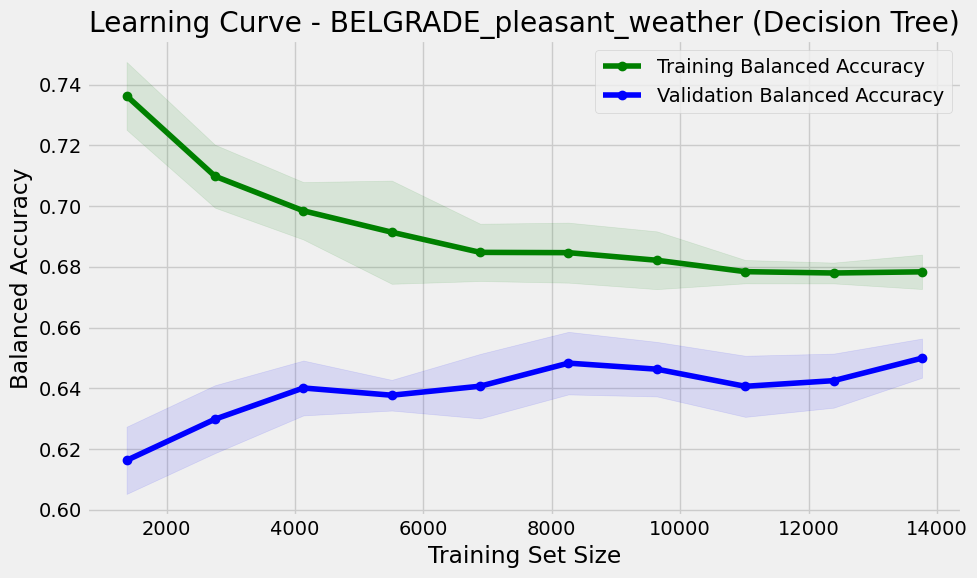

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier

# --- Model Setup: Use best parameters from GridSearchCV ---
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=20,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)

# --- Target column for BELGRADE ---
target_station_column = 'BELGRADE_pleasant_weather'
y_train_belgrade = y_train[target_station_column].astype(int)

# --- Generate Learning Curves ---
train_sizes, train_scores, val_scores = learning_curve(
    dt_model,
    X_train_reduced,  # reduced feature set
    y_train_belgrade,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# --- Compute mean and std deviation ---
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# --- Plot the learning curves ---
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='green', label='Training Balanced Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='green')

plt.plot(train_sizes, val_mean, 'o-', color='blue', label='Validation Balanced Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='blue')

plt.xlabel('Training Set Size')
plt.ylabel('Balanced Accuracy')
plt.title('Learning Curve - BELGRADE_pleasant_weather (Decision Tree)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()